<h1 align="center"> Лабораторная работа №2 </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

### Выполнили:
- **Соколов Никита**  
- **Минеев Кирилл**
- **Соловьев Дмитрий**
- **Семёнов Евгений**

---

### Проверил:
- **Догадин Егор Витальевич**

---

### 23 сентября 2024 г.

---

# Подготовка.

### Установка необходимых библиотек:

In [35]:
!pip install numpy matplotlib sympy


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import random
import math;

### Придумаем четыре целых числа a, b, c, d таким образом, чтобы все они были различными и ни одно из них не равнялось 0 или ±1.

In [37]:
a = random.randint(1, 6)
b = random.randint(a + 1, 11)
c = random.randint(b + 1, 16)
d = random.randint(c + 1, 21)

print(a, b, c, d, sep = "\t")

4	5	15	21


### Исходные значения x и y:

In [38]:
x_min, x_max = -5, 5
y_min, y_max = -4, 4

x_old = np.linspace(x_min, x_max, 11)
y_old = np.linspace(y_min, y_max, 9)
xy_old = np.column_stack([[x, y] for x in x_old for y in y_old])

### Функция для визуализации линейных отображений: 

In [39]:
colors = list(map(lambda x, y: (min(1, 1-y/4), min(1, 1+y/4), 1/5 + x/25), xy_old[0], xy_old[1]))

def plot_grid(xy_grid):
    plt.figure(figsize=(6, 6), facecolor="w")
    plt.scatter(xy_grid[0], xy_grid[1], s = 50, c = colors)
    plt.axis('equal')
    plt.grid(True)
    

### Функция для построения прямых:

In [40]:
def plot_line(k):
    x = np.linspace(x_min, x_max, 11)
    y = k * x
    plt.plot(x, y, color="red")
    plt.ylim(y_min, y_max)
    plt.show()

### Исходная сетка значений:

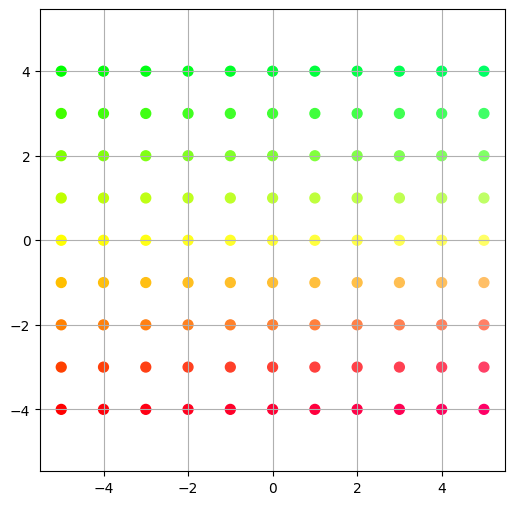

In [41]:
plot_grid(xy_old)

# Задание 1.

<h3 style="font-weight: bold;">1. Отражение (симметрия) плоскости относительно прямой y = ax: </h3>

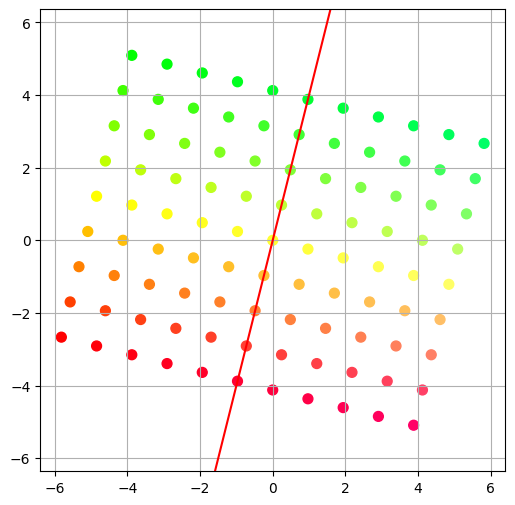

⎡0.970142500145332   0.242535625036333⎤
⎢                                     ⎥
⎣-0.242535625036333  0.970142500145332⎦


In [42]:
theta_angle = -(math.pi / 2 - np.arctan(a))

first_matrix = Matrix([
    [np.cos(theta_angle), -np.sin(theta_angle)],
    [np.sin(theta_angle), np.cos(theta_angle)]
])

xy_new = np.dot(first_matrix, xy_old)
plot_grid(xy_new)

plot_line(a)
pprint(first_matrix)

<h3 style="font-weight: bold;">2. Отображение всей плоскости в прямую y = bx: </h3>

⎡1  1⎤
⎢    ⎥
⎣5  5⎦


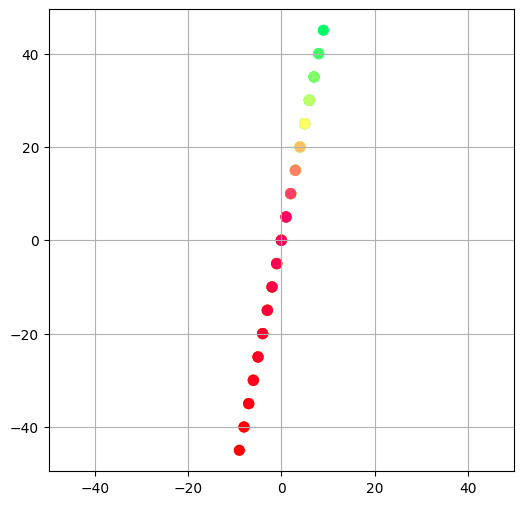

In [43]:
second_matrix = Matrix([
    [1, 1], 
    [b, b]
])

xy_new = np.dot(second_matrix, xy_old)

plot_grid(xy_new)
pprint(second_matrix)

<h3 style="font-weight: bold;">3. Поворот плоскости на 10c градусов против часовой стрелки: </h3>

⎡-0.866025403784439         -0.5       ⎤
⎢                                      ⎥
⎣       0.5          -0.866025403784439⎦


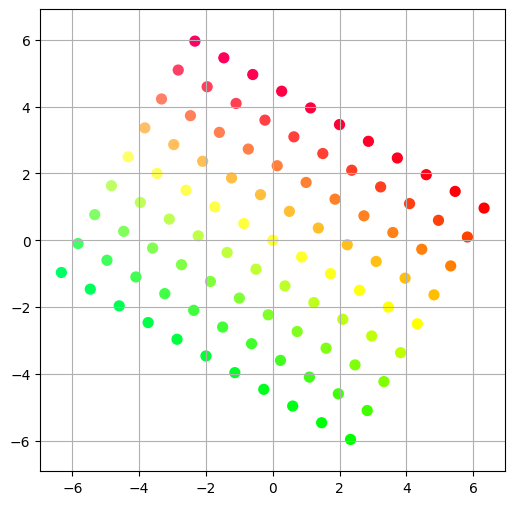

In [44]:
alpha_angle = np.radians(10 * c)

third_matrix = Matrix([
    [np.cos(alpha_angle), -np.sin(alpha_angle)],
    [np.sin(alpha_angle), np.cos(alpha_angle)]
])

xy_new = np.dot(third_matrix, xy_old)

plot_grid(xy_new)
pprint(third_matrix)

<h3 style="font-weight: bold;">4. Центральная симметрия плоскости относительно начала координат: </h3>

⎡-1.0   0  ⎤
⎢          ⎥
⎣ 0    -1.0⎦


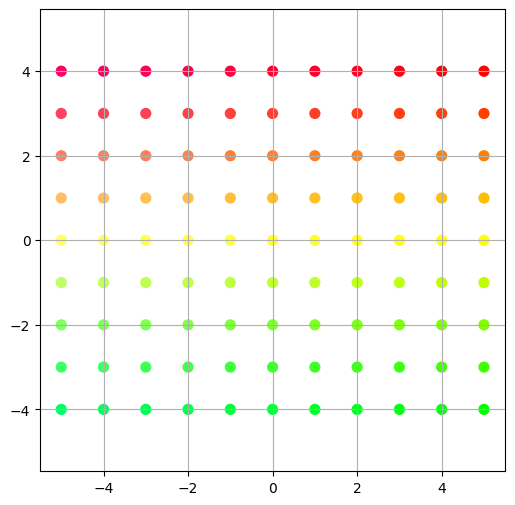

In [45]:
beta_angle = math.pi

fourth_matrix = Matrix([
    [np.cos(beta_angle), round(-np.sin(beta_angle))],
    [round(np.sin(beta_angle)), np.cos(beta_angle)]
])

xy_new = np.dot(fourth_matrix, xy_old)

plot_grid(xy_new)
pprint(fourth_matrix)

<h3 style="font-weight: bold;">5. Отображение, которое можно описать так: сначала отражение относительно прямой y = ax, потом поворот на 10d градусов по часовой стрелке: </h3>

⎡-0.961435862934972  0.275029237468465 ⎤
⎢                                      ⎥
⎣-0.275029237468465  -0.961435862934972⎦


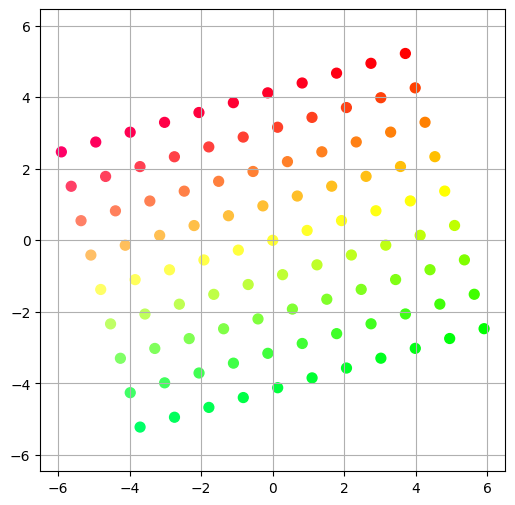

In [46]:
gamma_angle = np.radians(10 * d)

fifth_matrix = Matrix([
    [np.cos(gamma_angle), -np.sin(gamma_angle)],
    [np.sin(gamma_angle), np.cos(gamma_angle)]
]) * first_matrix

xy_new = np.dot(fifth_matrix, xy_old)

plot_grid(xy_new)
pprint(fifth_matrix)

<h3 style="font-weight: bold;">6. Отображение, которое переводит прямую y = 0 в y = ax и прямую x = 0 в y = bx: </h3>

⎡1  0.8⎤
⎢      ⎥
⎣4   4 ⎦


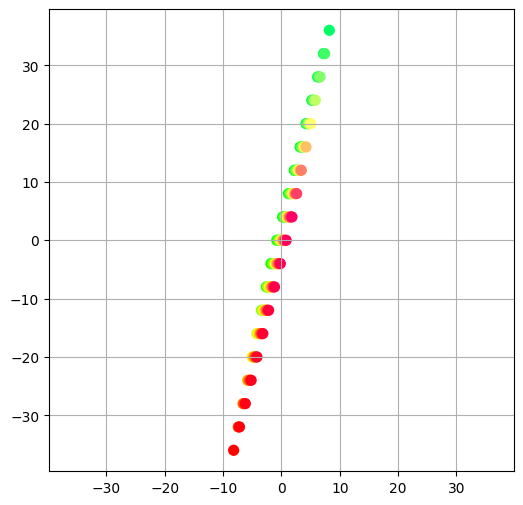

In [47]:
sixth_matrix = Matrix([
    [1, a / b],
    [a, a]
])

xy_new = np.dot(sixth_matrix, xy_old)

plot_grid(xy_new)
pprint(sixth_matrix)

<h3 style="font-weight: bold;">7. Отображение, которое переводит прямую y = ax в y = 0 и прямую y = bx в x = 0: </h3>

⎡5.0   -1.0⎤
⎢          ⎥
⎣-5.0  1.25⎦


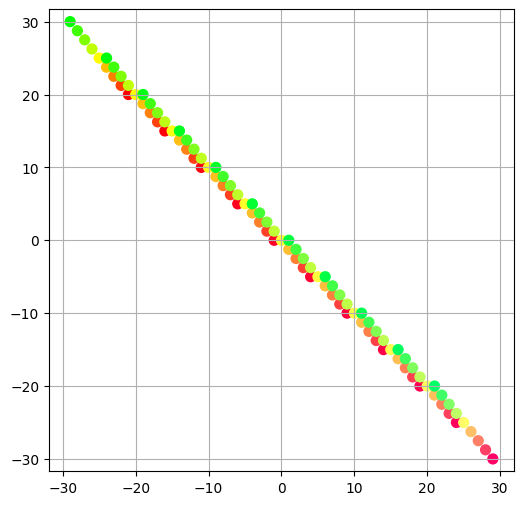

In [48]:
seventh_matrix = sixth_matrix.inv()

xy_new = np.dot(seventh_matrix, xy_old)

plot_grid(xy_new)
pprint(seventh_matrix)

<h3 style="font-weight: bold;">8. Отображение, которое меняет местами прямые y = ax и y = bx: </h3>

<h3 style="font-weight: bold;">9. Отображение, которое переводит круг единичной площади с центром в начале координат в круг площади c: </h3>

⎡15  0 ⎤
⎢      ⎥
⎣0   15⎦


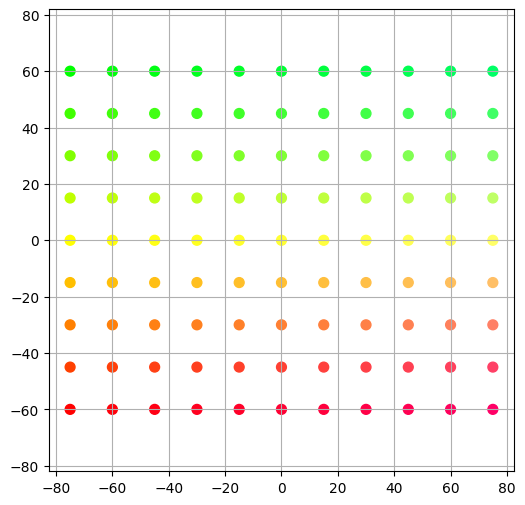

In [49]:
ninth_matrix = Matrix([
    [c, 0],
    [0, c]
])

xy_new = np.dot(ninth_matrix, xy_old)

plot_grid(xy_new)
pprint(ninth_matrix)

<h3 style="font-weight: bold;">10. Отображение, которое переводит круг единичной площади с центром в начале
координат в некруг площади d:</h3>

⎡6.6845076098596  0⎤
⎢                  ⎥
⎣       0         1⎦


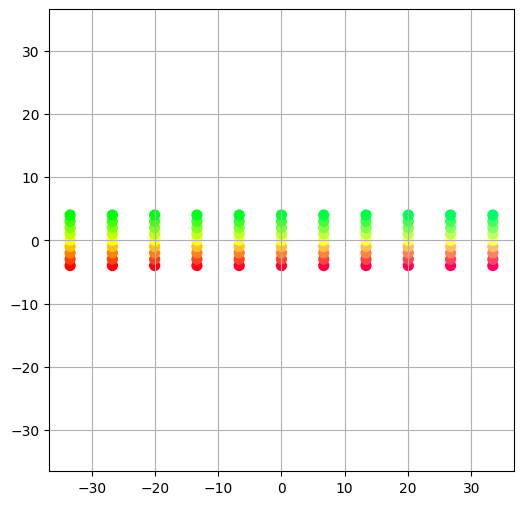

In [50]:
tenth_matrix = Matrix([
    [d / math.pi, 0],
    [0, 1]
])

xy_new = np.dot(tenth_matrix, xy_old)

plot_grid(xy_new)
pprint(tenth_matrix)

<h3 style="font-weight: bold;">11. Отображение, у которого собственные вектора перпендикулярны, и ни один из
них не лежит на прямой y = 0 или y = x:</h3>

⎡6.6845076098596  0⎤
⎢                  ⎥
⎣       0         1⎦


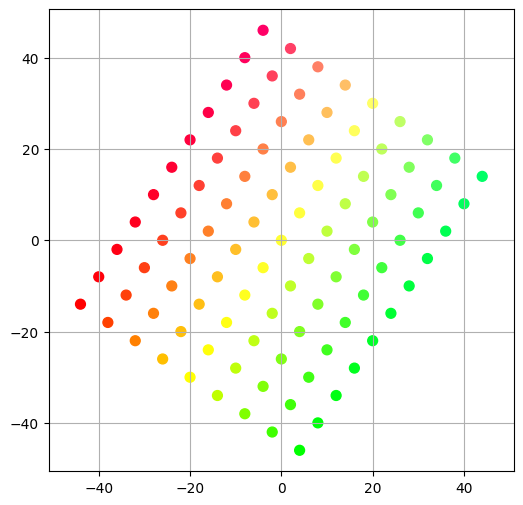

In [51]:
eleventh_matrix = Matrix([
    [4, 6],
    [6, -4]
])

xy_new = np.dot(eleventh_matrix, xy_old)

plot_grid(xy_new)
pprint(tenth_matrix)

 <h3 style="font-weight: bold;">12. Отображение, у которого нет двух неколлинеарных собственных векторов:</h3>

⎡2  1⎤
⎢    ⎥
⎣0  2⎦


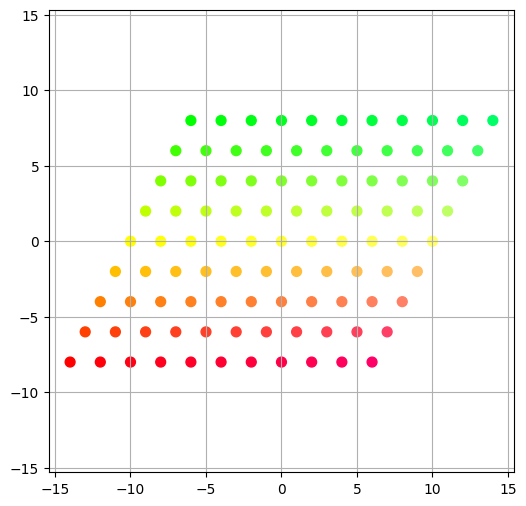

In [52]:
twelfth_matrix = Matrix([
    [2, 1],
    [0, 2]
])
xy_new = np.dot(twelfth_matrix, xy_old)

plot_grid(xy_new)
pprint(twelfth_matrix)

<h3 style="font-weight: bold;">13. Отображение, у которого нет ни одного вещественного собственного вектора (но при этом само отображение задаётся вещественной матрицей):</h3>

⎡2   3⎤
⎢     ⎥
⎣-3  2⎦


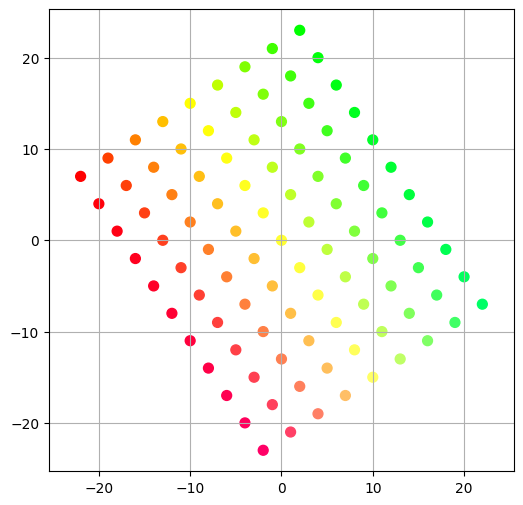

In [53]:
thirteenth_matrix = Matrix([
    [2, 3], 
    [-3, 2]
])

xy_new = np.dot(thirteenth_matrix, xy_old)

plot_grid(xy_new)
pprint(thirteenth_matrix)

<h3 style="font-weight: bold;">14. Отображение, для которого любой ненулевой вектор является собственным:</h3>

⎡1  0⎤
⎢    ⎥
⎣0  1⎦


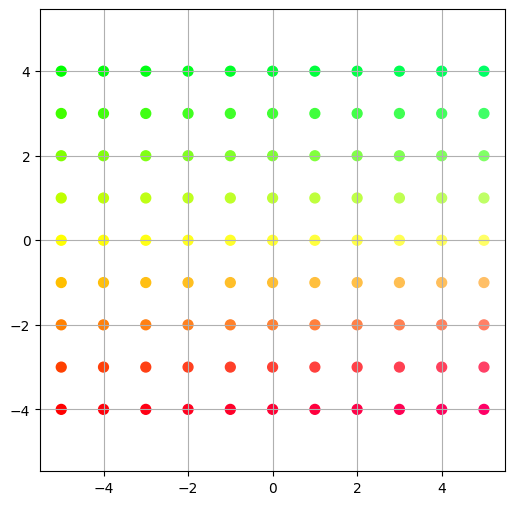

In [54]:
fourteenth_matrix = Matrix([
    [1, 0], 
    [0, 1]
])

xy_new = np.dot(fourteenth_matrix, xy_old)

plot_grid(xy_new)
pprint(fourteenth_matrix)

<h3 style="font-weight: bold;">15. Пару отображений, последовательное применение которых даёт различные результаты в зависимости от порядка: AB ̸= BA. Cделайте визуализацию всех рассматриваемых отображений, а именно: A, B, AB и BA:</h3>